## Set Up and Load Data

In [161]:
# Import Functions
import pandas as pd
import geopandas as gpd
import preprocessor as p
import re
import demoji 
import nltk

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Local modules
from pipelines import TwitterPipeline
from datasets import load_tweets
from tweet_functions import analyse_sentiment


# Download stopwords package if necessary
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [76]:
%matplotlib inline

In [2]:
# Load the Twitter data
tweets = load_tweets()
# Filter the tweets from Wales and format the text
tweets = TwitterPipeline().apply(tweets.data, verbosity=2)

Filter Tweets from Wales.....completed in 0:00:00.424074
Combine Text fields.....completed in 0:00:00.082996
Convert Geo Coordinates (in Floating Point).....completed in 0:00:00.848325
Collect BoundingBox Coordinates (GeoJSON).....completed in 0:00:02.262147
Collect BoundingBox Coordinates (Tuples).....completed in 0:00:00.495092
Match Local Authorities.....completed in 0:02:12.416727
Set DateTime Index.....completed in 0:00:53.573305


In [15]:
# Have a look at the first few rows of the data
tweets.head(20) 

,id_str,text,user.id_str,user.location,place.full_name,place.type,place.bounding_box.coordinates,geo.coordinates,quoted_status.text,retweeted_status,...,entities.urls.expanded_url,entities.hashtags.text,lat,long,geo_coords,bbox_geojson,bbox,lad18nm,lad18cd,lhb
created_at,,,,,,,,,,,,,,,,,,,,,
2020-03-23 12:46:50+00:00,1242070297861337088,Based in Cardiff!,577189548,"Cardiff, Wales","Cardiff, Wales",NaN,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...","((-3.278624, 51.447362), (-3.278624, 51.546641...",Cardiff,W06000015,Cardiff and Vale University Health Board
2020-03-23 12:47:35+00:00,1242070488781897728,@heaney16 You too- good luck 👍🏼,862718433032630272,"Cardiff, Wales","Cardiff, Wales",NaN,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...","((-3.278624, 51.447362), (-3.278624, 51.546641...",Cardiff,W06000015,Cardiff and Vale University Health Board
2020-03-23 12:47:44+00:00,1242070523997229057,Wonder if I can get some bagpipes online 🤔,19761088,"Colwyn Bay, Wales","Old Colwyn, Wales",NaN,"[[[-3.719375, 53.276655], [-3.719375, 53.29469...",,"Self-isolating? why not learn a new skill, lik...",NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.719375, 53.276655], [-3.719375, 53.29469...","((-3.719375, 53.276655), (-3.719375, 53.29469)...",Conwy,W06000003,Betsi Cadwaladr University Health Board
2020-03-23 12:47:51+00:00,1242070553827172353,WTF???,2546954147,"Llanelli,South Wales","Llanelli, Wales",NaN,"[[[-4.195223, 51.665338], [-4.195223, 51.70840...",,"The UK is still accepting flights from China, ...",NaN,...,NaN,NaN,NaN,NaN,None,"[[[-4.195223, 51.665338], [-4.195223, 51.70840...","((-4.195223, 51.665338), (-4.195223, 51.708405...",Carmarthenshire,W06000010,Hywel Dda University Health Board
2020-03-23 12:47:54+00:00,1242070569002156034,Protect the NHS..#StayHomeSaveLives,377427617,United Kingdom,"Pontypridd, Wales",NaN,"[[[-3.364431, 51.557104], [-3.364431, 51.63001...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.364431, 51.557104], [-3.364431, 51.63001...","((-3.364431, 51.557104), (-3.364431, 51.630012...",Rhondda Cynon Taf,W06000016,Cwm Taf Morgannwg University Health Board
2020-03-23 12:48:10+00:00,1242070633015631872,Great to see many resources being made availab...,28323717,"Cardiff, Wales","Cardiff, Wales",NaN,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...",,"Hey you, with lots of followers. \n\nCan you d...",NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.278624, 51.447362], [-3.278624, 51.54664...","((-3.278624, 51.447362), (-3.278624, 51.546641...",Cardiff,W06000015,Cardiff and Vale University Health Board
2020-03-23 12:48:11+00:00,1242070638560448515,@northshawmick Yes it’s only a matter of time,610720938,Newport\n,"Saint Julians, Wales",NaN,"[[[-2.994125, 51.590486], [-2.994125, 51.60939...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-2.994125, 51.590486], [-2.994125, 51.60939...","((-2.994125, 51.590486), (-2.994125, 51.609394...",Newport,W06000022,Aneurin Bevan University Health Board
2020-03-23 12:48:18+00:00,1242070668151267337,@KittyPopeEagle1 Yes my Cap........atain 👍👍👍👍☕...,2683683934,Chepstow,"Chepstow, Wales",NaN,"[[[-2.693385, 51.618664], [-2.693385, 51.64804...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-2.693385, 51.618664], [-2.693385, 51.64804...","((-2.693385, 51.618664), (-2.693385, 51.648046...",Monmouthshire,W06000021,Aneurin Bevan University Health Board
2020-03-23 12:48:28+00:00,1242070711537143808,@BBCRadioWales @wynneevans I just did the warm...,83567603,"Abertillery, Wales","Abertillery, Wales",NaN,"[[[-3.151625, 51.712984], [-3.151625, 51.74950...",,NaN,NaN,...,NaN,NaN,NaN,NaN,None,"[[[-3.151625, 51.712984], [-3.151625, 51.74950...","((-3.151625, 51.712984), (-3.151625, 51.749505...",Blaenau Gwent,W06000019,Aneurin Bevan University Health Board


For this part of the project many of these rows are reduntant, so to reduce unncessary data we will subset the dataframe. 

In [53]:
tweets = tweets[['id_str', 'text', 'user.id_str', 'user.location', 'place.full_name', 
                 'quoted_status.text', 'lad18nm','lad18cd', 'lhb']]
tweets.head()

,id_str,text,user.id_str,user.location,place.full_name,quoted_status.text,lad18nm,lad18cd,lhb
created_at,,,,,,,,,
2020-03-23 12:46:50+00:00,1242070297861337088,Based in Cardiff!,577189548,"Cardiff, Wales","Cardiff, Wales",NaN,Cardiff,W06000015,Cardiff and Vale University Health Board
2020-03-23 12:47:35+00:00,1242070488781897728,@heaney16 You too- good luck 👍🏼,862718433032630272,"Cardiff, Wales","Cardiff, Wales",NaN,Cardiff,W06000015,Cardiff and Vale University Health Board
2020-03-23 12:47:44+00:00,1242070523997229057,Wonder if I can get some bagpipes online 🤔,19761088,"Colwyn Bay, Wales","Old Colwyn, Wales","Self-isolating? why not learn a new skill, lik...",Conwy,W06000003,Betsi Cadwaladr University Health Board
2020-03-23 12:47:51+00:00,1242070553827172353,WTF???,2546954147,"Llanelli,South Wales","Llanelli, Wales","The UK is still accepting flights from China, ...",Carmarthenshire,W06000010,Hywel Dda University Health Board
2020-03-23 12:47:54+00:00,1242070569002156034,Protect the NHS..#StayHomeSaveLives,377427617,United Kingdom,"Pontypridd, Wales",NaN,Rhondda Cynon Taf,W06000016,Cwm Taf Morgannwg University Health Board


## Clean the text for VADER

[VADER sentiment analysis](https://github.com/cjhutto/vaderSentiment) can manage social media text relatively well, but we'd like to remove some 'red-herrings' like @mentions and URL links. 
We'll use a package called `tweet-preprocessor` to do this. 

In [41]:
# Choose some example tweets to illustrate the package
example_tweet = tweets['text'][14]
example_tweet2 = tweets['text'][8]
print(example_tweet,'\n\n',example_tweet2)

@Gregb1987 @crickshouts @GuyEJTownsend https://t.co/Nms174Rvnf 

 @BBCRadioWales @wynneevans I just did the warm up and joined in. The wife came running up the stairs because she thought I had someone else in here with me. As if lol #WorkingatHome


In [19]:
# Tokenisation example:
p.tokenize(example_tweet)

'$MENTION$ $MENTION$ $MENTION$ $URL$'

In [33]:
p.tokenize(example_tweet2)

'$MENTION$ $MENTION$ I just did the warm up and joined in. The wife came running up the stairs because she thought I had someone else in here with me. As if lol #WorkingatHome'

In [50]:
# Parsing URLS
parsed_tweet = p.parse(example_tweet)
parsed_tweet.urls

[(39:62) => https://t.co/Nms174Rvnf]

In [57]:
# Text cleaning examples
p.set_options(p.OPT.URL, p.OPT.MENTION) #Choosing to remove URLS and @mentions gives: 
p.clean(example_tweet)

''

In [58]:
p.clean(example_tweet2)

'I just did the warm up and joined in. The wife came running up the stairs because she thought I had someone else in here with me. As if lol #WorkingatHome'

The package appears to work well. For now we just want to clean the tweets. VADER interprets emoji so we would like to just clean away mentions and URLS. 

In [54]:
# Remove URLS and @Mentions from tweets. 
p.set_options(p.OPT.URL, p.OPT.MENTION)
tweets['text_vader'] = tweets['text'].apply(lambda tweet: p.clean(tweet)).copy()

In [60]:
# Now that we have cleaned the data we can analyse the sentiment. 
tweets = analyse_sentiment(tweets)

## Clean the text for TF-IDF

In order to analyse word frequencies and importance we also need a version of the text that has been rigorously normalised. This will mean removing all special characters, emoji, lemmatisig and tokenising each tweet. 
For emoji removal we will use [demoji](https://github.com/bsolomon1124/demoji)

In [142]:
# Firstly, we'll use demoji to remove all the emoji from the text. 
tweets['text_norm'] = tweets['text'].apply(lambda tweet: demoji.replace(tweet, '')).copy()

In [143]:
# Use the tweet preprocesser to remove tweet-specific features from the text. 
tweets['text_norm'] = tweets['text_norm'].apply(lambda tweet: p.tokenize(tweet))

In [144]:
# Lower case all words
tweets["text_norm"] = tweets["text_norm"].str.lower()

In [145]:
# Remove special characters (make sure to run this AFTER lowercasing)
tweets["text_norm"] = tweets["text_norm"].apply(lambda x: re.sub("[^a-z\s]", "", x))

In [149]:
# Removing stopwords (using stopword list from NLTK) - NB this takes AGES.
stopwords = set(stopwords.words('english'))
tweets["text_norm"] = tweets["text_norm"].apply(
    lambda x: " ".join(word for word in x.split() if word not in stopwords)
)

In [163]:
# Lemmatise the text
lemmatizer = WordNetLemmatizer() 

In [177]:
tweets["text_norm"] = tweets["text_norm"].apply(
    lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split())
)

In [179]:
# The tweet text is now normalised
tweets.head()

,id_str,text,user.id_str,user.location,place.full_name,quoted_status.text,lad18nm,lad18cd,lhb,text_c,vader_comp,vader_pos,vader_neg,vader_neu,text_norm,text_norm_lem
created_at,,,,,,,,,,,,,,,,
2020-03-23 12:46:50+00:00,1242070297861337088,Based in Cardiff!,577189548,"Cardiff, Wales","Cardiff, Wales",NaN,Cardiff,W06000015,Cardiff and Vale University Health Board,Based in Cardiff!,0.0000,0.000,0.0,1.000,based cardiff,based cardiff
2020-03-23 12:47:35+00:00,1242070488781897728,@heaney16 You too- good luck 👍🏼,862718433032630272,"Cardiff, Wales","Cardiff, Wales",NaN,Cardiff,W06000015,Cardiff and Vale University Health Board,You too- good luck 👍🏼,0.7096,0.424,0.0,0.576,mention good luck,mention good luck
2020-03-23 12:47:44+00:00,1242070523997229057,Wonder if I can get some bagpipes online 🤔,19761088,"Colwyn Bay, Wales","Old Colwyn, Wales","Self-isolating? why not learn a new skill, lik...",Conwy,W06000003,Betsi Cadwaladr University Health Board,Wonder if I can get some bagpipes online 🤔,0.0000,0.000,0.0,1.000,wonder get bagpipe online,wonder get bagpipe online
2020-03-23 12:47:51+00:00,1242070553827172353,WTF???,2546954147,"Llanelli,South Wales","Llanelli, Wales","The UK is still accepting flights from China, ...",Carmarthenshire,W06000010,Hywel Dda University Health Board,WTF???,-0.6531,0.000,1.0,0.000,wtf,wtf
2020-03-23 12:47:54+00:00,1242070569002156034,Protect the NHS..#StayHomeSaveLives,377427617,United Kingdom,"Pontypridd, Wales",NaN,Rhondda Cynon Taf,W06000016,Cwm Taf Morgannwg University Health Board,Protect the NHS..#StayHomeSaveLives,0.3818,0.565,0.0,0.435,protect nhsstayhomesavelives,protect nhsstayhomesavelives


# Sentiment of tweets about self-isolation

In [180]:
# Get subset of tweets which mention self isolation, using a regular expression. 
tweets_selfiso = tweets[tweets["text"].str.contains("(\w{4})?\s?-?isolat", regex=True, na=False)].copy()

/Users/Nina/Documents/OneDrive - University of Bristol/Documents/Research Projects/venvs/covidcommunities/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [71]:
# Lets count how many tweets we have per day
tweets_selfiso["vader_comp"].resample("D").count()

created_at
2020-03-23 00:00:00+00:00    109
2020-03-24 00:00:00+00:00    184
2020-03-25 00:00:00+00:00    175
2020-03-26 00:00:00+00:00    124
2020-03-27 00:00:00+00:00    155
2020-03-28 00:00:00+00:00    113
2020-03-29 00:00:00+00:00    111
2020-03-30 00:00:00+00:00     90
2020-03-31 00:00:00+00:00     99
2020-04-01 00:00:00+00:00     83
2020-04-02 00:00:00+00:00     95
2020-04-03 00:00:00+00:00     99
2020-04-04 00:00:00+00:00     78
2020-04-05 00:00:00+00:00     68
2020-04-06 00:00:00+00:00     58
2020-04-07 00:00:00+00:00     34
Freq: D, Name: vader_comp, dtype: int64

To begin with the tweets about self-isolation were between 100-200 per day, but this went down over time and had declined to less that 100 a day at the beginning of April. Let's look at a graph of that:

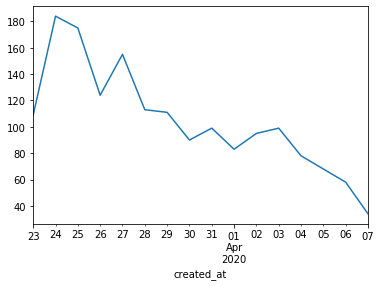

In [86]:
# Graph of tweets per day, associated with self isolation
tweets_selfiso["vader_comp"].resample("D").count().plot()

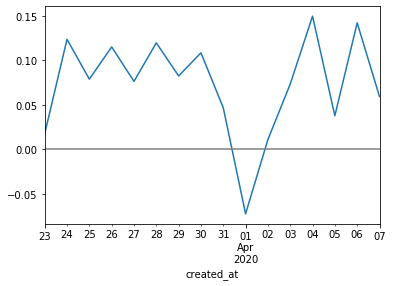

In [105]:
# Now, lets look at the daily average of the composite vader tweets.
tweets_selfiso["vader_comp"].resample("D").mean().plot()
plt.axhline(y=0, color="gray")

Something unusual happened on the 1st April 2020, and the score didn't appear to return to normal until the 4th. Worth looking into. 

Now though, we're going to try implementing a moving average for sentiment, to identify when drops in sentiment are actually important when viewed in the context of the surrounding time. 

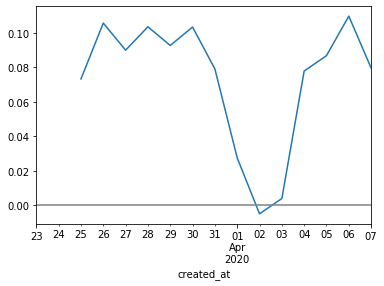

In [108]:
# Let's plot a three day moving average
tweets_selfiso["vader_comp"].resample("D").mean().rolling(3).mean().plot()
plt.axhline(y=0, color="gray")

# Themes around Self Isolation
In the text cleaning add another section for normalised text (no stop words, lemmatised and tokenised with no emoji. (but do replace URL, MENTION AND EMOJI first). Also remove #. The run TFIDF using scikit learn. 

In [154]:
vectorizer = TfidfVectorizer()

In [181]:
matrix = vectorizer.fit_transform(tweets['text_norm'])

In [194]:
import numpy as np
features = np.array(vectorizer.get_feature_names())

In [193]:
matrix

<162017x72385 sparse matrix of type '<class 'numpy.float64'>'
	with 1294335 stored elements in Compressed Sparse Row format>

# Looking into tweets about COVID

In [ ]:
#First, create a subset about the tweets of interest. 
covid_keyws = [
    "corona",
    "covid", 
    "virus",
    "pandemic,", 
    "outbreak", 
    "c19",
    "work(ing)? ?from ?home",
    "home ?school",
    "social\s?-?distanc",
    "quarantine",
    "stay ?(at)? ?home",
    "flatten ?the ?curve",
    "covidiot",
    "notgoingout",
    "lock ?down",
    "whenthisisallover"
]
tweets_covid = tweets[tweets["text"].str.contains("|".join(covid_keyws), regex=True)].copy()